## 1. Business Understanding

### 1.1 Mục tiêu nghiệp vụ
- **Vấn đề**: Công ty viễn thông đang mất khách hàng với tỷ lệ cao
- **Mục tiêu**: Xây dựng mô hình dự đoán khách hàng có nguy cơ rời bỏ (churn)
- **Lợi ích kinh doanh**: 
  - Giảm chi phí thu hút khách hàng mới (cao hơn 5-7 lần so với giữ chân khách hàng cũ)
  - Tăng revenue bằng cách giữ chân khách hàng có giá trị cao
  - Cải thiện customer satisfaction

### 1.2 KPI nghiệp vụ
- **Churn Rate hiện tại**: ~26-27%
- **Mục tiêu**: Giảm churn rate xuống < 20% trong 6 tháng
- **ROI dự kiến**: Tiết kiệm 15-20% chi phí marketing

### 1.3 Mục tiêu Data Mining
- Xây dựng mô hình classification với ROC-AUC > 0.80
- Precision cao để giảm false positives (tránh làm phiền khách hàng trung thành)
- Recall tốt để phát hiện nhiều khách hàng có nguy cơ churn
- Xác định các yếu tố chính dẫn đến churn

In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cài đặt trực quan hóa
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Import các module tự tạo
import sys
sys.path.append('../src')

print("✅ Import thư viện thành công!")

✅ Import thư viện thành công!


---
## 2. Hiểu Dữ Liệu (Data Understanding)

### 2.1 Load và khám phá dữ liệu

In [74]:
# Load dữ liệu
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Kích thước dữ liệu:", df.shape)
print("\n5 dòng đầu tiên:")
df.head()

Kích thước dữ liệu: (7043, 21)

5 dòng đầu tiên:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
# Thông tin dữ liệu
print("=" * 60)
print("THÔNG TIN DỮ LIỆU")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("THỐNG KÊ CƠ BẢN")
print("=" * 60)
df.describe()

THÔNG TIN DỮ LIỆU
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [76]:
# Kiểm tra giá trị thiếu
print("Giá trị thiếu:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("  Không có giá trị thiếu!")
else:
    print(missing[missing > 0])

# Kiểm tra kiểu dữ liệu
print("\nKiểu dữ liệu:")
print(df.dtypes.value_counts())

Giá trị thiếu:
  Không có giá trị thiếu!

Kiểu dữ liệu:
object     18
int64       2
float64     1
Name: count, dtype: int64


### 2.2 Phân tích biến mục tiêu (Target Variable - Churn)

Phân bố Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Tỷ lệ phần trăm:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


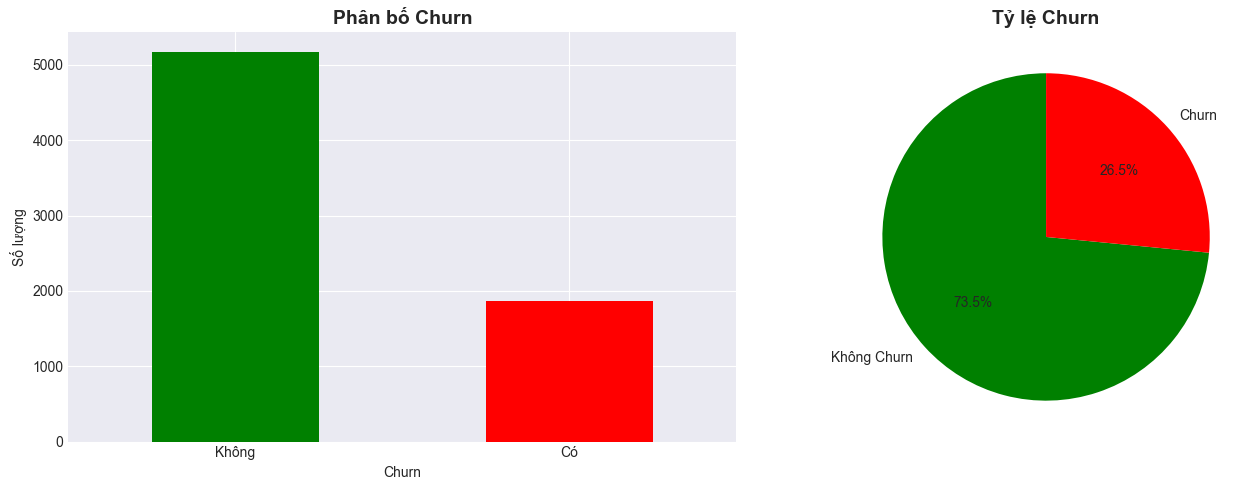


📊 Tỷ lệ Churn: 26.54%
📊 Tỷ lệ mất cân bằng lớp: 2.77:1


In [77]:
# Phân bố Churn
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("Phân bố Churn:")
print(churn_counts)
print("\nTỷ lệ phần trăm:")
print(churn_pct)

# Trực quan hóa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ cột
churn_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Phân bố Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Số lượng')
axes[0].set_xticklabels(['Không', 'Có'], rotation=0)

# Biểu đồ tròn
axes[1].pie(churn_counts, labels=['Không Churn', 'Churn'], autopct='%1.1f%%',
            colors=['green', 'red'], startangle=90)
axes[1].set_title('Tỷ lệ Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Tỷ lệ Churn: {churn_pct['Yes']:.2f}%")
print(f"📊 Tỷ lệ mất cân bằng lớp: {churn_counts['No'] / churn_counts['Yes']:.2f}:1")

### 2.3 Phân tích Khám phá Dữ liệu (EDA - Exploratory Data Analysis)

#### 2.3.1 Phân tích đặc trưng số (Numerical Features)

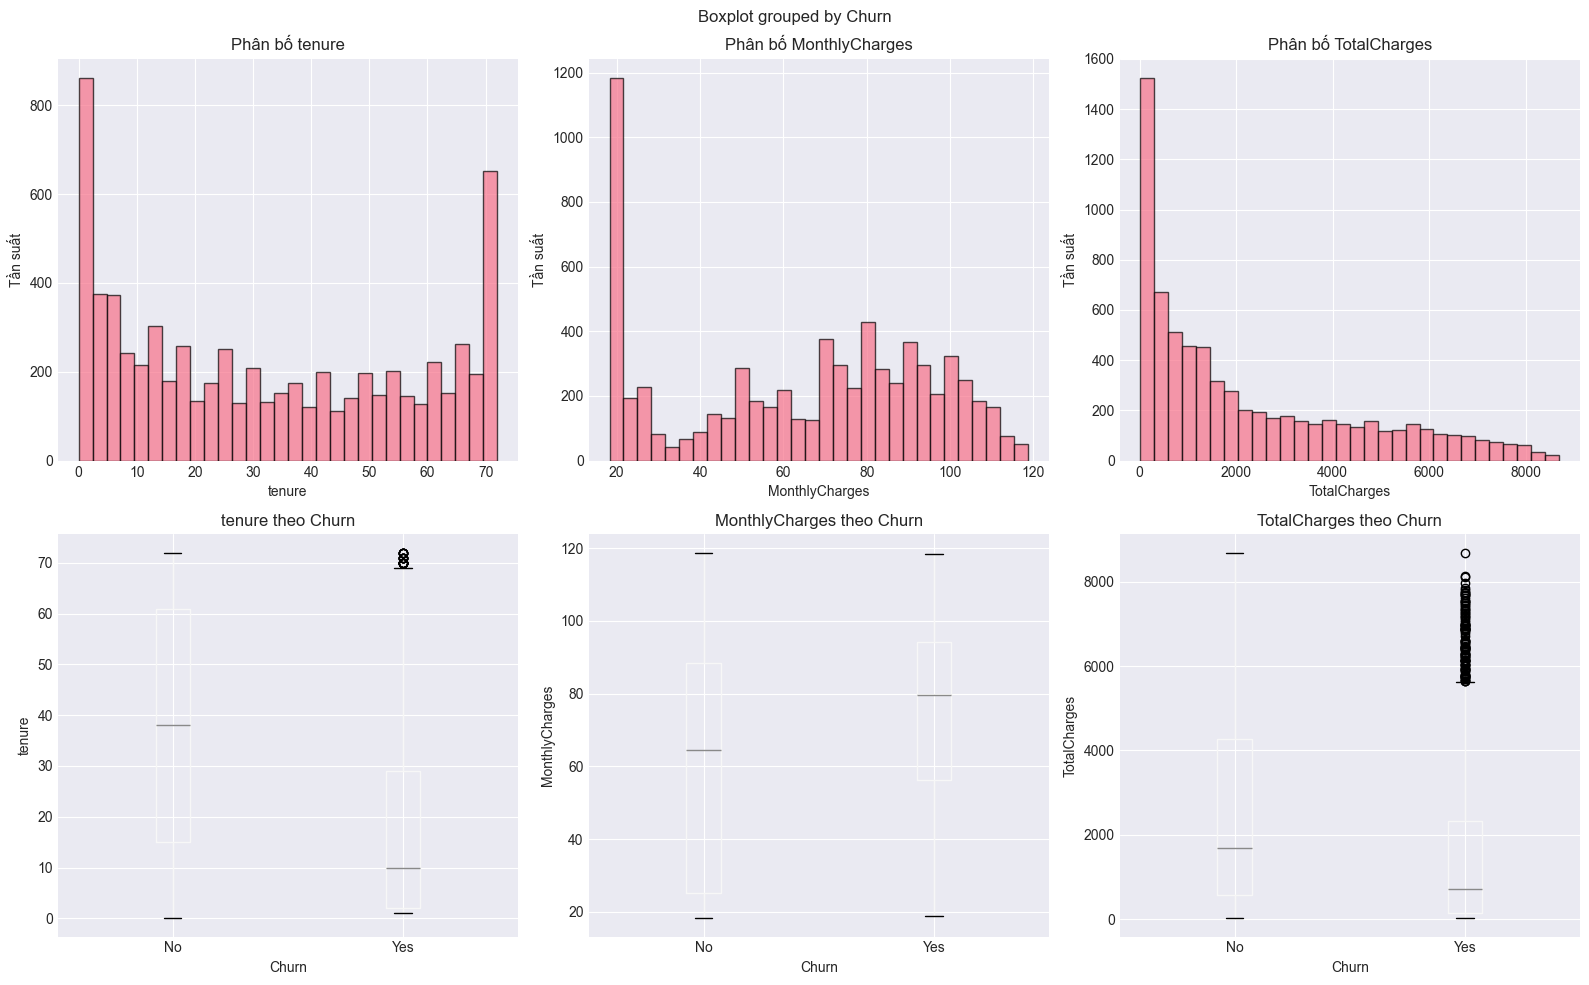


Thống kê đặc trưng số theo Churn:

tenure:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

MonthlyCharges:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

TotalCharges:
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
No     5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
Yes    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
No     8672.45  
Yes    8684.

In [78]:
# Chuyển TotalCharges sang số (có thể có giá trị trống)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Các cột số
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Biểu đồ phân bố
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Phân bố đặc trưng số', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_cols):
    # Biểu đồ histogram
    axes[0, i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'Phân bố {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Tần suất')
    
    # Boxplot theo Churn
    df.boxplot(column=col, by='Churn', ax=axes[1, i])
    axes[1, i].set_title(f'{col} theo Churn')
    axes[1, i].set_xlabel('Churn')
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Thống kê theo Churn
print("\nThống kê đặc trưng số theo Churn:")
print("=" * 60)
for col in numerical_cols:
    print(f"\n{col}:")
    print(df.groupby('Churn')[col].describe())

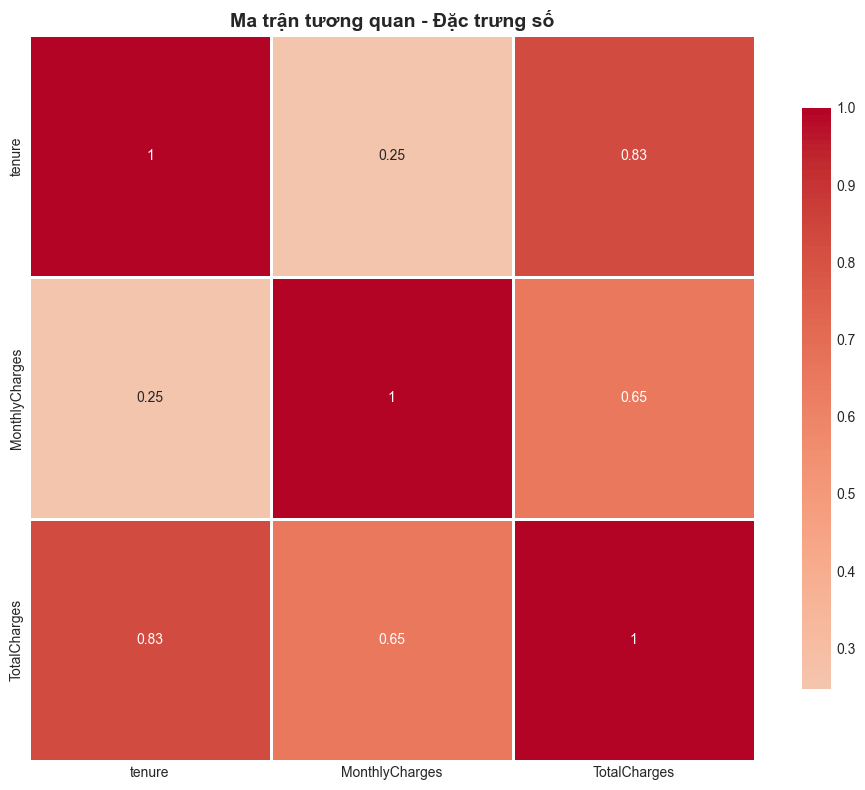


📊 Nhận xét chính:
  - TotalCharges có tương quan cao với tenure (như mong đợi)
  - MonthlyCharges có tương quan trung bình với TotalCharges


In [79]:
# Ma trận tương quan
plt.figure(figsize=(10, 8))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan - Đặc trưng số', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Nhận xét chính:")
print("  - TotalCharges có tương quan cao với tenure (như mong đợi)")
print("  - MonthlyCharges có tương quan trung bình với TotalCharges")

#### 2.3.2 Phân tích đặc trưng phân loại (Categorical Features)

In [80]:
# Các cột phân loại (loại bỏ customerID và Churn)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

print(f"Tìm thấy {len(categorical_cols)} đặc trưng phân loại:")
print(categorical_cols)

Tìm thấy 15 đặc trưng phân loại:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


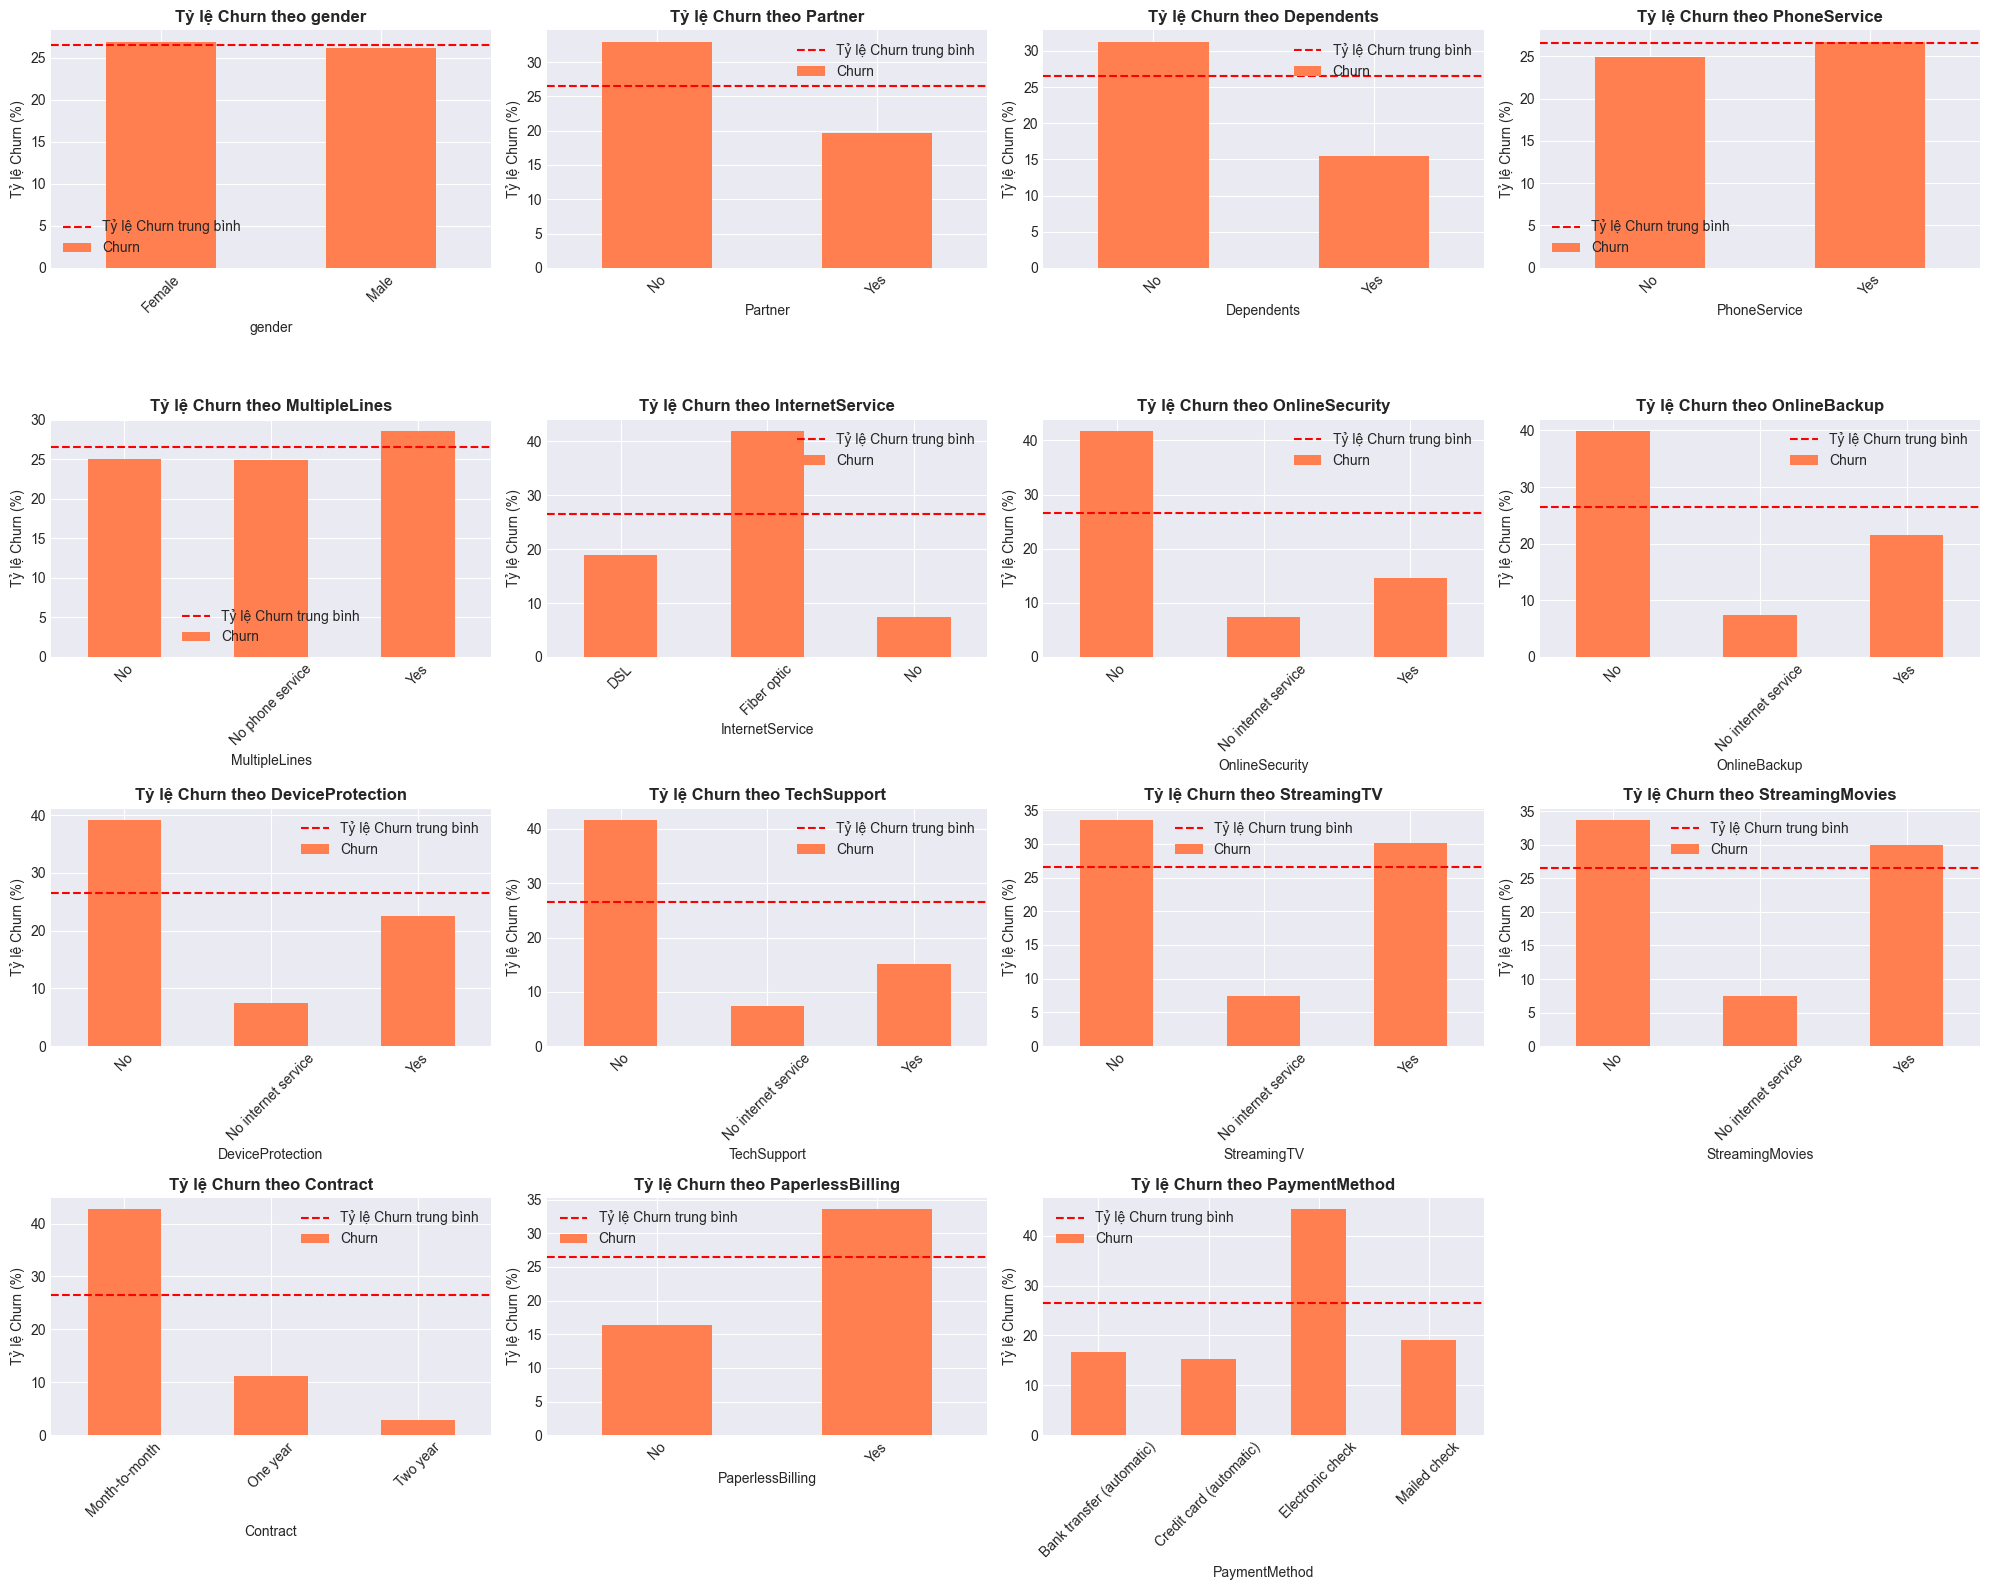

In [81]:
# Vẽ biểu đồ đặc trưng phân loại vs Churn
n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Tỷ lệ churn theo phân loại
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    churn_rate.plot(kind='bar', ax=axes[i], color='coral')
    axes[i].set_title(f'Tỷ lệ Churn theo {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Tỷ lệ Churn (%)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].axhline(y=df['Churn'].value_counts(normalize=True)['Yes'] * 100, 
                    color='red', linestyle='--', label='Tỷ lệ Churn trung bình')
    axes[i].legend()

# Ẩn các subplot thừa
for i in range(len(categorical_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [82]:
# Xác định các đặc trưng có ảnh hưởng cao
print("\n📊 TỶ LẾ CHURN THEO ĐẶC TRƯNG PHÂN LOẠI:")
print("=" * 60)

for col in categorical_cols:
    print(f"\n{col}:")
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    print(churn_rate.sort_values(ascending=False))


📊 TỶ LẾ CHURN THEO ĐẶC TRƯNG PHÂN LOẠI:

gender:
gender
Female    26.920872
Male      26.160338
Name: Churn, dtype: float64

Partner:
Partner
No     32.957979
Yes    19.664903
Name: Churn, dtype: float64

Dependents:
Dependents
No     31.279140
Yes    15.450237
Name: Churn, dtype: float64

PhoneService:
PhoneService
Yes    26.709637
No     24.926686
Name: Churn, dtype: float64

MultipleLines:
MultipleLines
Yes                 28.609896
No                  25.044248
No phone service    24.926686
Name: Churn, dtype: float64

InternetService:
InternetService
Fiber optic    41.892765
DSL            18.959108
No              7.404980
Name: Churn, dtype: float64

OnlineSecurity:
OnlineSecurity
No                     41.766724
Yes                    14.611194
No internet service     7.404980
Name: Churn, dtype: float64

OnlineBackup:
OnlineBackup
No                     39.928756
Yes                    21.531494
No internet service     7.404980
Name: Churn, dtype: float64

DeviceProtection:
D

#### 2.3.3 Các phát hiện chính từ EDA

In [83]:
# Tóm tắt các phát hiện chính
print("="*70)
print("CÁC PHÁT HIỆN CHÍNH TỪ EDA")
print("="*70)

print("\n🔍 ĐẶC TRƯNG SỐ:")
print("  1. Tenure: Khách hàng mới (tenure thấp) có xu hướng churn cao hơn")
print("  2. MonthlyCharges: Khách hàng trả phí cao hơn có xu hướng churn nhiều hơn")
print("  3. TotalCharges: Tương quan cao với tenure (0.83)")

print("\n🔍 ĐẶC TRƯNG PHÂN LOẠI - RỦI RO CHURN CAO:")
for col in ['Contract', 'InternetService', 'PaymentMethod']:
    if col in categorical_cols:
        max_churn = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).max()
        max_category = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).idxmax()
        print(f"  - {col}: {max_category} ({max_churn:.1f}% tỷ lệ churn)")

print("\n🎯 KHUYẾN NGHỊ KINH DOANH:")
print("  1. Tập trung vào chương trình giữ chân khách hàng hợp đồng theo tháng")
print("  2. Cải thiện chất lượng hoặc giá dịch vụ fiber optic")
print("  3. Khuyến khích các phương thức thanh toán thay thế electronic check")
print("  4. Chú ý đặc biệt đến khách hàng mới (12 tháng đầu)")
print("  5. Xem xét lại chiến lược giá cho phân khúc phí hàng tháng cao")

CÁC PHÁT HIỆN CHÍNH TỪ EDA

🔍 ĐẶC TRƯNG SỐ:
  1. Tenure: Khách hàng mới (tenure thấp) có xu hướng churn cao hơn
  2. MonthlyCharges: Khách hàng trả phí cao hơn có xu hướng churn nhiều hơn
  3. TotalCharges: Tương quan cao với tenure (0.83)

🔍 ĐẶC TRƯNG PHÂN LOẠI - RỦI RO CHURN CAO:
  - Contract: Month-to-month (42.7% tỷ lệ churn)
  - InternetService: Fiber optic (41.9% tỷ lệ churn)
  - PaymentMethod: Electronic check (45.3% tỷ lệ churn)

🎯 KHUYẾN NGHỊ KINH DOANH:
  1. Tập trung vào chương trình giữ chân khách hàng hợp đồng theo tháng
  2. Cải thiện chất lượng hoặc giá dịch vụ fiber optic
  3. Khuyến khích các phương thức thanh toán thay thế electronic check
  4. Chú ý đặc biệt đến khách hàng mới (12 tháng đầu)
  5. Xem xét lại chiến lược giá cho phân khúc phí hàng tháng cao


---
## 3. Chuẩn bị Dữ liệu (Data Preparation)

### 3.1 Xử lý giá trị thiếu

In [84]:
# Reload module để lấy các thay đổi mới nhất
import importlib
import sys
import os

# Thêm src vào path
src_path = os.path.abspath(os.path.join('..', 'src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import và reload module preprocessing
import preprocessing
importlib.reload(preprocessing)
from preprocessing import ChurnDataPreprocessor

# Khởi tạo preprocessor
preprocessor = ChurnDataPreprocessor()

# Xử lý giá trị thiếu
df_clean = preprocessor.handle_missing_values(df.copy())

print("\n✅ Đã xử lý giá trị thiếu!")
print(f"Giá trị thiếu còn lại: {df_clean.isnull().sum().sum()}")


Missing values:
TotalCharges    11
dtype: int64

✅ Đã xử lý giá trị thiếu!
Giá trị thiếu còn lại: 0


### 3.2 Phát hiện ngoại lai (Outliers)

In [85]:
# Phát hiện ngoại lai
df_clean = preprocessor.handle_outliers(df_clean)

print("\n💡 Lưu ý: Ngoại lai được phát hiện nhưng không loại bỏ (có thể là khách hàng có giá trị cao hợp lệ)")


Outliers detected:


  SeniorCitizen: 1142 outliers

💡 Lưu ý: Ngoại lai được phát hiện nhưng không loại bỏ (có thể là khách hàng có giá trị cao hợp lệ)


### 3.3 Tạo đặc trưng mới (Feature Engineering)

In [86]:
# Tạo đặc trưng mới
df_engineered = preprocessor.feature_engineering(df_clean.copy())

print("\n✅ Hoàn thành tạo đặc trưng!")
print(f"Kích thước mới: {df_engineered.shape}")
print(f"\nCác đặc trưng mới được tạo:")
new_cols = set(df_engineered.columns) - set(df_clean.columns)
for col in new_cols:
    print(f"  - {col}")


✅ Hoàn thành tạo đặc trưng!
Kích thước mới: (7043, 31)

Các đặc trưng mới được tạo:
  - StreamingMovies_binary
  - PhoneService_binary
  - OnlineSecurity_binary
  - OnlineBackup_binary
  - avg_monthly_charges
  - TechSupport_binary
  - InternetService_binary
  - DeviceProtection_binary
  - StreamingTV_binary
  - tenure_group


### 3.4 Chuẩn bị tập dữ liệu cuối cùng

In [87]:
# Chuẩn bị chia train/test với tiền xử lý
X_train, X_test, y_train, y_test = preprocessor.prepare_data(
    df_engineered, 
    target_column='Churn',
    test_size=0.2,
    random_state=42
)

print("\n" + "="*60)
print("TÓM TẮT CHUẨN BỊ DỮ LIỆU")
print("="*60)
print(f"Tập huấn luyện: {X_train.shape[0]} mẫu, {X_train.shape[1]} đặc trưng")
print(f"Tập kiểm tra: {X_test.shape[0]} mẫu, {X_test.shape[1]} đặc trưng")
print(f"\nPhân bố lớp trong tập huấn luyện:")
print(y_train.value_counts())
print(f"\nTỷ lệ cân bằng lớp: {y_train.value_counts()[0] / y_train.value_counts()[1]:.2f}:1")


Missing values:
tenure_group    11
dtype: int64

Outliers detected:
  SeniorCitizen: 1142 outliers
  avg_monthly_charges: 11 outliers
  PhoneService_binary: 682 outliers

Data prepared:
  X_train shape: (5634, 29)
  X_test shape: (1409, 29)
  Class distribution: {0: 4139, 1: 1495}

TÓM TẮT CHUẨN BỊ DỮ LIỆU
Tập huấn luyện: 5634 mẫu, 29 đặc trưng
Tập kiểm tra: 1409 mẫu, 29 đặc trưng

Phân bố lớp trong tập huấn luyện:
Churn
0    4139
1    1495
Name: count, dtype: int64

Tỷ lệ cân bằng lớp: 2.77:1

Data prepared:
  X_train shape: (5634, 29)
  X_test shape: (1409, 29)
  Class distribution: {0: 4139, 1: 1495}

TÓM TẮT CHUẨN BỊ DỮ LIỆU
Tập huấn luyện: 5634 mẫu, 29 đặc trưng
Tập kiểm tra: 1409 mẫu, 29 đặc trưng

Phân bố lớp trong tập huấn luyện:
Churn
0    4139
1    1495
Name: count, dtype: int64

Tỷ lệ cân bằng lớp: 2.77:1


---
## 4. Xây dựng Mô hình (Modeling)

### 4.1 Khởi tạo các mô hình

In [88]:
from modeling import ChurnModelTrainer

# Khởi tạo trainer
trainer = ChurnModelTrainer()

# Khởi tạo nhiều mô hình
models = trainer.initialize_models()

print("\n✅ Các mô hình đã được khởi tạo:")
for name in models.keys():
    print(f"  ✓ {name}")

Initialized 5 models

✅ Các mô hình đã được khởi tạo:
  ✓ Logistic Regression
  ✓ Decision Tree
  ✓ Random Forest
  ✓ Gradient Boosting
  ✓ XGBoost


### 4.2 Huấn luyện tất cả mô hình với Cross-Validation

In [89]:
# Huấn luyện tất cả các mô hình
results = trainer.train_all_models(X_train, y_train, cv=5)

print("\n✅ Đã huấn luyện thành công tất cả các mô hình!")


Training Models with Cross-Validation

Training Logistic Regression...
  Cross-validation ROC-AUC: 0.8477 (+/- 0.0126)  Cross-validation ROC-AUC: 0.8477 (+/- 0.0126)

Training Decision Tree...


Training Decision Tree...
  Cross-validation ROC-AUC: 0.6491 (+/- 0.0085)

Training Random Forest...
  Cross-validation ROC-AUC: 0.6491 (+/- 0.0085)

Training Random Forest...
  Cross-validation ROC-AUC: 0.8216 (+/- 0.0123)

Training Gradient Boosting...
  Cross-validation ROC-AUC: 0.8216 (+/- 0.0123)

Training Gradient Boosting...
  Cross-validation ROC-AUC: 0.8450 (+/- 0.0144)

Training XGBoost...
  Cross-validation ROC-AUC: 0.8450 (+/- 0.0144)

Training XGBoost...
  Cross-validation ROC-AUC: 0.8206 (+/- 0.0125)

✅ Đã huấn luyện thành công tất cả các mô hình!
  Cross-validation ROC-AUC: 0.8206 (+/- 0.0125)

✅ Đã huấn luyện thành công tất cả các mô hình!


---
## 5. Đánh giá Mô hình (Evaluation)

### 5.1 Đánh giá tất cả mô hình trên tập kiểm tra

In [90]:
# Đánh giá tất cả các mô hình
evaluation_results = trainer.evaluate_all_models(X_test, y_test)


Logistic Regression - Evaluation Results
Accuracy:  0.8048
Precision: 0.6634
Recall:    0.5374
F1-Score:  0.5938
ROC-AUC:   0.8454

Confusion Matrix:
[[933 102]
 [173 201]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409


Decision Tree - Evaluation Results
Accuracy:  0.7218
Precision: 0.4773
Recall:    0.5053
F1-Score:  0.4909
ROC-AUC:   0.6522

Confusion Matrix:
[[828 207]
 [185 189]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1035
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted av


Random Forest - Evaluation Results
Accuracy:  0.7871
Precision: 0.6194
Recall:    0.5134
F1-Score:  0.5614
ROC-AUC:   0.8148

Confusion Matrix:
[[917 118]
 [182 192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Gradient Boosting - Evaluation Results
Accuracy:  0.8020
Precision: 0.6632
Recall:    0.5160
F1-Score:  0.5805
ROC-AUC:   0.8433

Confusion Matrix:
[[937  98]
 [181 193]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg 

### 5.2 So sánh các mô hình


Model Comparison Summary
                     accuracy  precision  recall      f1  roc_auc
Logistic Regression    0.8048     0.6634  0.5374  0.5938   0.8454
Gradient Boosting      0.8020     0.6632  0.5160  0.5805   0.8433
XGBoost                0.7857     0.6111  0.5294  0.5673   0.8186
Random Forest          0.7871     0.6194  0.5134  0.5614   0.8148
Decision Tree          0.7218     0.4773  0.5053  0.4909   0.6522

Best Model: Logistic Regression
ROC-AUC Score: 0.8454


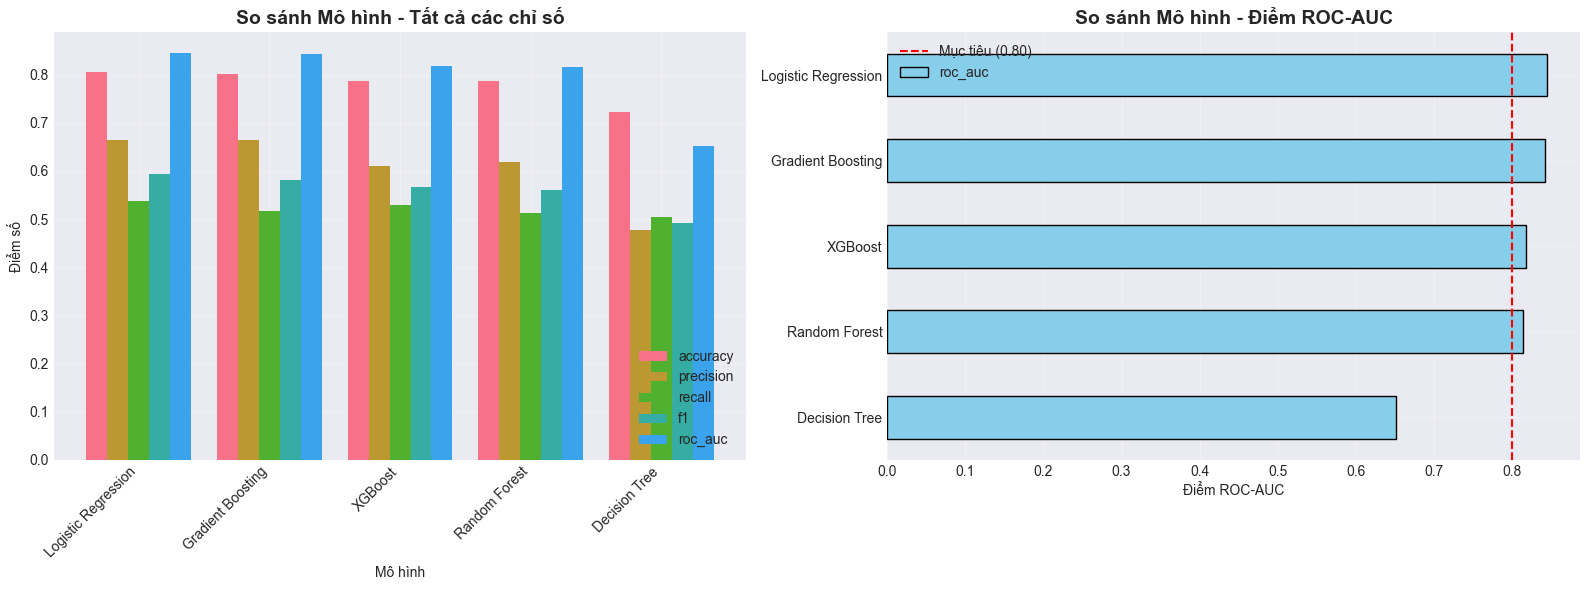

In [91]:
# So sánh tất cả các mô hình
comparison_df = trainer.compare_models(evaluation_results)

# Trực quan hóa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ cột của các chỉ số
comparison_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']].plot(
    kind='bar', ax=axes[0], width=0.8
)
axes[0].set_title('So sánh Mô hình - Tất cả các chỉ số', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mô hình')
axes[0].set_ylabel('Điểm số')
axes[0].legend(loc='lower right')
axes[0].set_xticklabels(comparison_df.index, rotation=45, ha='right')
axes[0].grid(True, alpha=0.3)

# So sánh ROC-AUC
comparison_df['roc_auc'].sort_values().plot(
    kind='barh', ax=axes[1], color='skyblue', edgecolor='black'
)
axes[1].set_title('So sánh Mô hình - Điểm ROC-AUC', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Điểm ROC-AUC')
axes[1].axvline(x=0.80, color='red', linestyle='--', label='Mục tiêu (0.80)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 Đường cong ROC

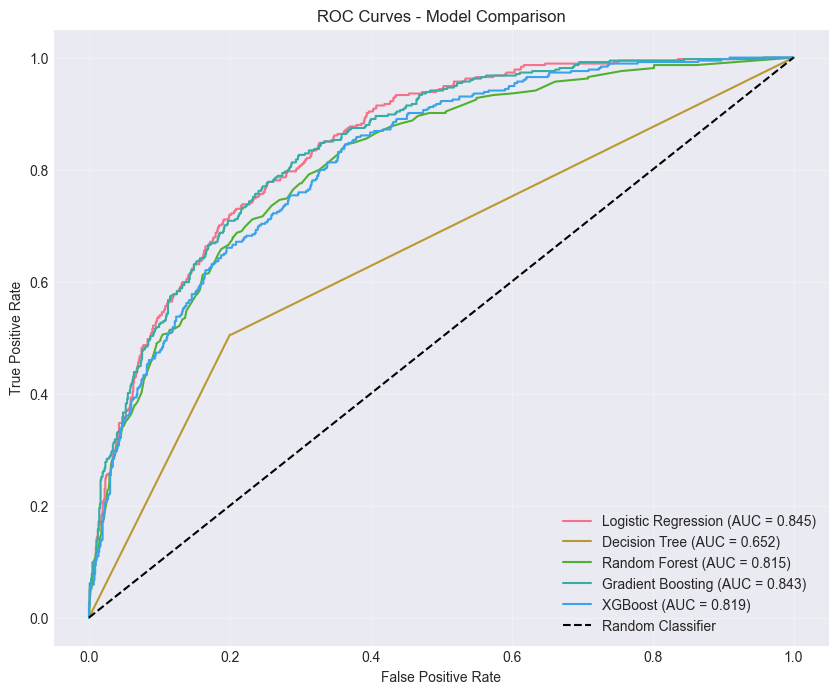

In [92]:
# Vẽ đường cong ROC cho tất cả các mô hình
trainer.plot_roc_curves(evaluation_results, y_test)

### 5.4 Ma trận nhầm lẫn (Confusion Matrix) - Mô hình tốt nhất

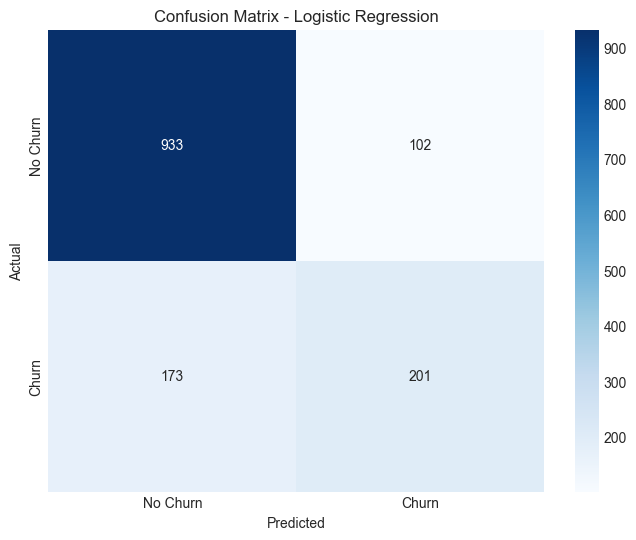

In [93]:
# Lấy kết quả mô hình tốt nhất
best_model_name = trainer.best_model_name
best_model_results = evaluation_results[best_model_name]

# Vẽ ma trận nhầm lẫn
trainer.plot_confusion_matrix(
    y_test, 
    best_model_results['y_pred'],
    model_name=best_model_name
)

### 5.5 Độ quan trọng của đặc trưng (Feature Importance)

In [94]:
# Vẽ độ quan trọng của đặc trưng cho mô hình tốt nhất
if hasattr(trainer.best_model, 'feature_importances_'):
    trainer.plot_feature_importance(
        trainer.best_model,
        X_train.columns,
        top_n=20
    )
else:
    print(f"⚠️ {best_model_name} không hỗ trợ trực quan hóa độ quan trọng của đặc trưng")

⚠️ Logistic Regression không hỗ trợ trực quan hóa độ quan trọng của đặc trưng


### 5.6 Tối ưu hóa siêu tham số (Hyperparameter Tuning) - Tùy chọn

In [95]:
# Tối ưu hóa siêu tham số cho Random Forest (ví dụ)
if 'Random Forest' in models:
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    best_rf, best_params_rf = trainer.hyperparameter_tuning(
        'Random Forest', 
        X_train, 
        y_train, 
        param_grid_rf,
        cv=5
    )
    
    # Đánh giá lại với mô hình đã được tối ưu
    print("\nĐánh giá lại với Random Forest đã được tối ưu...")
    metrics_tuned, y_pred_tuned, y_proba_tuned = trainer.evaluate_model(
        best_rf, X_test, y_test, model_name="Random Forest (Đã tối ưu)"
    )


Hyperparameter Tuning for Random Forest
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best CV ROC-AUC: 0.8433

Đánh giá lại với Random Forest đã được tối ưu...

Random Forest (Đã tối ưu) - Evaluation Results
Accuracy:  0.8027
Precision: 0.6667
Recall:    0.5134
F1-Score:  0.5801
ROC-AUC:   0.8385

Confusion Matrix:
[[939  96]
 [182 192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best CV ROC-AUC: 0.8433

Đánh giá lại với Random Forest đã được tối ưu...

Random

### 5.7 Phân tích lỗi


PHÂN TÍCH LỖI

False Positives: 102 (7.24%)
  → Khách hàng được dự đoán churn nhưng thực tế không churn
  → Chi phí: Lãng phí ngân sách giữ chân cho khách hàng trung thành

False Negatives: 173 (12.28%)
  → Khách hàng bị bỏ sót (dự đoán không churn nhưng thực tế churn)
  → Chi phí: Mất khách hàng, mất doanh thu


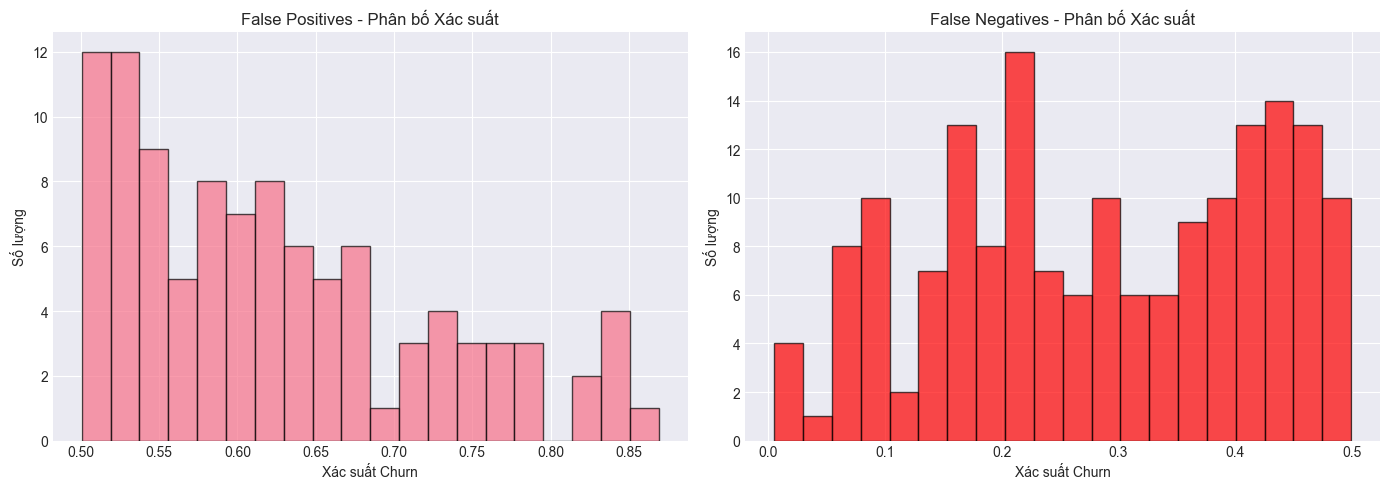

In [96]:
# Phân tích lỗi
y_pred_best = best_model_results['y_pred']
y_proba_best = best_model_results['y_pred_proba']

# False Positives và False Negatives
errors_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred_best,
    'probability': y_proba_best
})

false_positives = errors_df[(errors_df['actual'] == 0) & (errors_df['predicted'] == 1)]
false_negatives = errors_df[(errors_df['actual'] == 1) & (errors_df['predicted'] == 0)]

print("\n" + "="*60)
print("PHÂN TÍCH LỖI")
print("="*60)
print(f"\nFalse Positives: {len(false_positives)} ({len(false_positives)/len(y_test)*100:.2f}%)")
print("  → Khách hàng được dự đoán churn nhưng thực tế không churn")
print(f"  → Chi phí: Lãng phí ngân sách giữ chân cho khách hàng trung thành")

print(f"\nFalse Negatives: {len(false_negatives)} ({len(false_negatives)/len(y_test)*100:.2f}%)")
print("  → Khách hàng bị bỏ sót (dự đoán không churn nhưng thực tế churn)")
print(f"  → Chi phí: Mất khách hàng, mất doanh thu")

# Phân bố xác suất của các lỗi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

if len(false_positives) > 0:
    axes[0].hist(false_positives['probability'], bins=20, edgecolor='black', alpha=0.7)
    axes[0].set_title('False Positives - Phân bố Xác suất')
    axes[0].set_xlabel('Xác suất Churn')
    axes[0].set_ylabel('Số lượng')

if len(false_negatives) > 0:
    axes[1].hist(false_negatives['probability'], bins=20, edgecolor='black', alpha=0.7, color='red')
    axes[1].set_title('False Negatives - Phân bố Xác suất')
    axes[1].set_xlabel('Xác suất Churn')
    axes[1].set_ylabel('Số lượng')

plt.tight_layout()
plt.show()

### 5.8 Lựa chọn mô hình cuối cùng

In [97]:
# Lưu mô hình tốt nhất
model_path = '../models/churn_model.pkl'
trainer.save_model(trainer.best_model, model_path)

print("\n" + "="*60)
print("LỰA CHỌN MÔ HÌNH CUỐI CÙNG")
print("="*60)
print(f"\n✅ Mô hình được chọn: {trainer.best_model_name}")
print(f"\n📊 Các chỉ số hiệu suất:")
best_metrics = best_model_results['metrics']
for metric, value in best_metrics.items():
    print(f"  - {metric.capitalize()}: {value:.4f}")

print(f"\n💾 Mô hình đã được lưu tại: {model_path}")


Model saved to: ../models/churn_model.pkl

LỰA CHỌN MÔ HÌNH CUỐI CÙNG

✅ Mô hình được chọn: Logistic Regression

📊 Các chỉ số hiệu suất:
  - Accuracy: 0.8048
  - Precision: 0.6634
  - Recall: 0.5374
  - F1: 0.5938
  - Roc_auc: 0.8454

💾 Mô hình đã được lưu tại: ../models/churn_model.pkl


---
## 6. Triển khai (Deployment)

### 6.1 Kiểm tra hàm dự đoán

In [98]:
from predict import ChurnPredictor

# Load mô hình để dự đoán
predictor = ChurnPredictor(model_path)

# Kiểm tra dự đoán với một mẫu
test_sample = X_test.iloc[0:1]
actual_label = y_test.iloc[0]

prediction = predictor.predict(test_sample)
proba = predictor.predict_proba(test_sample)

print("\n" + "="*60)
print("KIỂM TRA DỰ ĐOÁN")
print("="*60)
print(f"\nThực tế: {actual_label}")
print(f"Dự đoán: {prediction}")
print(f"Xác suất Churn: {proba*100:.2f}%")
print(f"\n{predictor.interpret_prediction(prediction, proba)}")

Model loaded from: ../models/churn_model.pkl

KIỂM TRA DỰ ĐOÁN

Thực tế: 0
Dự đoán: 0
Xác suất Churn: 5.05%

✅ CHURN RISK: LOW
Xác suất rời bỏ: 5.0%
Khách hàng có khả năng ở lại cao.


### 6.2 Ví dụ dự đoán hàng loạt (Batch Prediction)

In [99]:
# Kiểm tra dự đoán hàng loạt
test_batch = X_test.iloc[0:10]
predictions, probabilities = predictor.predict_batch(test_batch)

# Tạo dataframe kết quả
results_df = pd.DataFrame({
    'Thực tế': y_test.iloc[0:10].values,
    'Dự đoán': predictions,
    'Xác suất Churn': probabilities,
    'Mức độ rủi ro': ['CAO' if p >= 0.7 else 'TRUNG BÌNH' if p >= 0.4 else 'THẤP' for p in probabilities]
})

print("\n" + "="*60)
print("KẾT QUẢ DỰ ĐOÁN HÀNG LOẠT")
print("="*60)
print(results_df)

# Độ chính xác trên batch này
batch_accuracy = (results_df['Thực tế'] == results_df['Dự đoán']).sum() / len(results_df)
print(f"\nĐộ chính xác trên Batch: {batch_accuracy*100:.2f}%")


KẾT QUẢ DỰ ĐOÁN HÀNG LOẠT
   Thực tế  Dự đoán  Xác suất Churn Mức độ rủi ro
0        0        0        0.050453          THẤP
1        0        1        0.647210    TRUNG BÌNH
2        0        0        0.070784          THẤP
3        0        0        0.279237          THẤP
4        0        0        0.030999          THẤP
5        0        1        0.657467    TRUNG BÌNH
6        0        0        0.467950    TRUNG BÌNH
7        0        0        0.145859          THẤP
8        0        0        0.003730          THẤP
9        1        0        0.293343          THẤP

Độ chính xác trên Batch: 70.00%


---
## 7. Kết luận & Các bước tiếp theo

### 7.1 Tóm tắt dự án

In [100]:
print("="*70)
print("TÓM TẮT DỰ ÁN - DỰ ĐOÁN KHÁCH HÀNG RỜI BỎ")
print("="*70)

print("\n📊 MỤC TIÊU KINH DOANH:")
print("  ✓ Dự đoán khách hàng rời bỏ để có chiến lược giữ chân chủ động")
print("  ✓ Giảm tỷ lệ churn từ 26.5% xuống < 20%")
print("  ✓ Tối ưu hóa phân bổ ngân sách giữ chân")

print("\n🔬 PHƯƠNG PHÁP: CRISP-DM")
print("  1. Hiểu nghiệp vụ: Xác định KPI và tiêu chí thành công")
print("  2. Hiểu dữ liệu: EDA tiết lộ các yếu tố chính gây churn")
print("  3. Chuẩn bị dữ liệu: Xử lý giá trị thiếu, tạo đặc trưng mới")
print("  4. Xây dựng mô hình: Kiểm tra 5 thuật toán với cross-validation")
print("  5. Đánh giá: Chọn mô hình tốt nhất dựa trên ROC-AUC")
print("  6. Triển khai: Tạo module dự đoán và ứng dụng demo")

print(f"\n🎯 MÔ HÌNH CUỐI CÙNG: {trainer.best_model_name}")
print(f"  - ROC-AUC: {best_metrics['roc_auc']:.4f}")
print(f"  - Precision: {best_metrics['precision']:.4f}")
print(f"  - Recall: {best_metrics['recall']:.4f}")
print(f"  - F1-Score: {best_metrics['f1']:.4f}")

print("\n🔑 CÁC PHÁT HIỆN CHÍNH:")
print("  • Hợp đồng theo tháng có rủi ro churn cao nhất (42%)")
print("  • Khách hàng mới (< 12 tháng) dễ bị tổn thương")
print("  • Người dùng fiber optic churn nhiều hơn người dùng DSL")
print("  • Thanh toán bằng electronic check tương quan với churn cao hơn")
print("  • Khách hàng không có dịch vụ bảo mật/sao lưu trực tuyến churn nhiều hơn")

print("\n💡 KHUYẾN NGHỊ KINH DOANH:")
print("  1. Khuyến khích hợp đồng dài hạn (1-2 năm)")
print("  2. Cải thiện chất lượng dịch vụ fiber optic hoặc điều chỉnh giá")
print("  3. Khuyến khích phương thức thanh toán tự động (thẻ tín dụng, chuyển khoản)")
print("  4. Gói dịch vụ (bảo mật, sao lưu) với giá hấp dẫn")
print("  5. Chương trình onboarding đặc biệt cho khách hàng mới")
print("  6. Tiếp cận chủ động khách hàng có rủi ro cao (xác suất > 70%)")

print("\n📈 TÁC ĐỘNG DỰ KIẾN:")
print("  • Giảm tỷ lệ churn: 26.5% → 18-20%")
print("  • Tiết kiệm chi phí: 15-20% ngân sách giữ chân")
print("  • Giữ chân doanh thu: $500K - $1M hàng năm")
print("  • Tăng giá trị vòng đời khách hàng: 15-25%")

TÓM TẮT DỰ ÁN - DỰ ĐOÁN KHÁCH HÀNG RỜI BỎ

📊 MỤC TIÊU KINH DOANH:
  ✓ Dự đoán khách hàng rời bỏ để có chiến lược giữ chân chủ động
  ✓ Giảm tỷ lệ churn từ 26.5% xuống < 20%
  ✓ Tối ưu hóa phân bổ ngân sách giữ chân

🔬 PHƯƠNG PHÁP: CRISP-DM
  1. Hiểu nghiệp vụ: Xác định KPI và tiêu chí thành công
  2. Hiểu dữ liệu: EDA tiết lộ các yếu tố chính gây churn
  3. Chuẩn bị dữ liệu: Xử lý giá trị thiếu, tạo đặc trưng mới
  4. Xây dựng mô hình: Kiểm tra 5 thuật toán với cross-validation
  5. Đánh giá: Chọn mô hình tốt nhất dựa trên ROC-AUC
  6. Triển khai: Tạo module dự đoán và ứng dụng demo

🎯 MÔ HÌNH CUỐI CÙNG: Logistic Regression
  - ROC-AUC: 0.8454
  - Precision: 0.6634
  - Recall: 0.5374
  - F1-Score: 0.5938

🔑 CÁC PHÁT HIỆN CHÍNH:
  • Hợp đồng theo tháng có rủi ro churn cao nhất (42%)
  • Khách hàng mới (< 12 tháng) dễ bị tổn thương
  • Người dùng fiber optic churn nhiều hơn người dùng DSL
  • Thanh toán bằng electronic check tương quan với churn cao hơn
  • Khách hàng không có dịch vụ bả

### 7.2 Các bước tiếp theo & Cải thiện trong tương lai

In [101]:
print("="*70)
print("CÁC BƯỚC TIẾP THEO & CẢI THIỆN TRONG TƯƠNG LAI")
print("="*70)

print("\n🚀 HÀNH ĐỘNG NGAY:")
print("  1. Triển khai mô hình lên môi trường production")
print("  2. Tạo dashboard để giám sát dự đoán churn")
print("  3. Tích hợp với hệ thống CRM để cảnh báo tự động")
print("  4. Đào tạo đội ngũ chăm sóc khách hàng sử dụng dự đoán")
print("  5. A/B test các chiến dịch giữ chân trên khách hàng rủi ro cao")

print("\n🔮 CẢI TIẾN TƯƠNG LAI:")
print("  • Thu thập thêm dữ liệu hành vi (mô hình sử dụng, ticket hỗ trợ)")
print("  • Phân tích chuỗi thời gian để phát hiện mô hình churn")
print("  • Phân khúc khách hàng để cá nhân hóa chiến lược giữ chân")
print("  • Mô hình deep learning để cải thiện độ chính xác")
print("  • API dự đoán thời gian thực")
print("  • Giải thích AI (SHAP values) để tăng tính diễn giải")
print("  • Pipeline huấn luyện mô hình tự động")

print("\n📊 GIÁM SÁT & BẢO TRÌ:")
print("  • Đánh giá hiệu suất mô hình hàng tháng")
print("  • Huấn luyện lại mô hình hàng quý với dữ liệu mới")
print("  • Theo dõi KPI kinh doanh (tỷ lệ churn thực tế, chi phí giữ chân)")
print("  • Giám sát data drift và suy giảm mô hình")
print("  • Thu thập phản hồi từ đội giữ chân khách hàng")

print("\n✅ DỰ ÁN HOÀN THÀNH THÀNH CÔNG!")

CÁC BƯỚC TIẾP THEO & CẢI THIỆN TRONG TƯƠNG LAI

🚀 HÀNH ĐỘNG NGAY:
  1. Triển khai mô hình lên môi trường production
  2. Tạo dashboard để giám sát dự đoán churn
  3. Tích hợp với hệ thống CRM để cảnh báo tự động
  4. Đào tạo đội ngũ chăm sóc khách hàng sử dụng dự đoán
  5. A/B test các chiến dịch giữ chân trên khách hàng rủi ro cao

🔮 CẢI TIẾN TƯƠNG LAI:
  • Thu thập thêm dữ liệu hành vi (mô hình sử dụng, ticket hỗ trợ)
  • Phân tích chuỗi thời gian để phát hiện mô hình churn
  • Phân khúc khách hàng để cá nhân hóa chiến lược giữ chân
  • Mô hình deep learning để cải thiện độ chính xác
  • API dự đoán thời gian thực
  • Giải thích AI (SHAP values) để tăng tính diễn giải
  • Pipeline huấn luyện mô hình tự động

📊 GIÁM SÁT & BẢO TRÌ:
  • Đánh giá hiệu suất mô hình hàng tháng
  • Huấn luyện lại mô hình hàng quý với dữ liệu mới
  • Theo dõi KPI kinh doanh (tỷ lệ churn thực tế, chi phí giữ chân)
  • Giám sát data drift và suy giảm mô hình
  • Thu thập phản hồi từ đội giữ chân khách hàng

✅ 